In [24]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('911.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [27]:
#top 5 count of zip
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [28]:
#total no. of unique titles
df['title'].nunique()

110

In [60]:
#in the reasons there are many reson to call 911
#use lambda apply to split reason form table in new table reason
df['Reason']= df['title'].apply(lambda title: title.split(':')[0])

In [61]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [31]:
#as the time is in string use pd.to datetime to convert string to date
#use apply method to create 3 columns hour,month,date of week
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [32]:
#using map() change the day of week to like mon, tues...
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [33]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

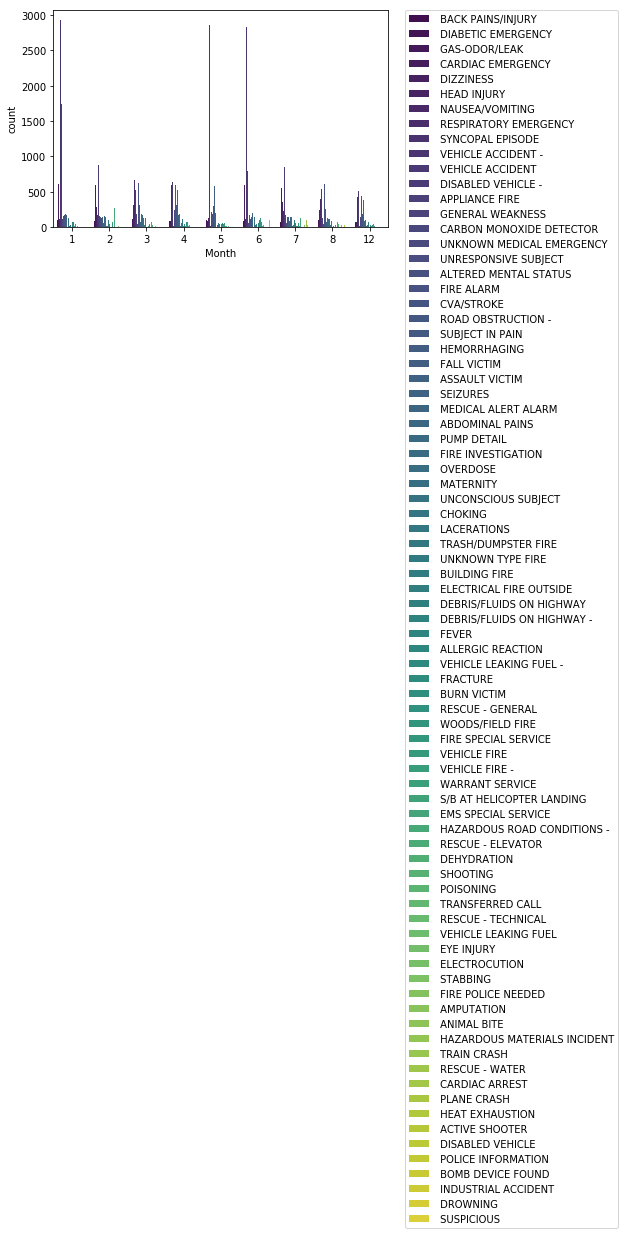

In [36]:
sn.countplot(x='Month', data=df, hue='Reason', palette='viridis' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [37]:
#some mnth are missing so now we aggregate total months
byMonth=df.groupby('Month').count()

In [38]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


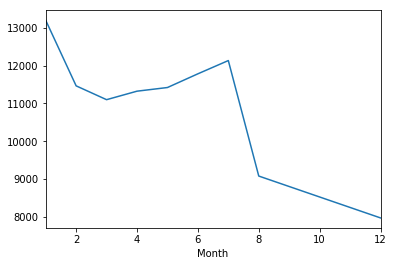

In [39]:
#plot call per month by lattitude as main value
byMonth['lat'].plot()

No handles with labels found to put in legend.


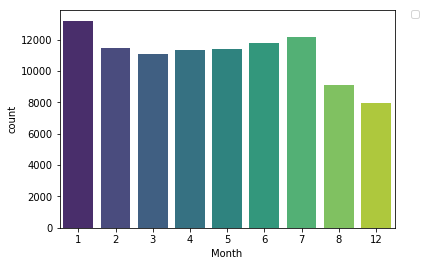

In [40]:
#for detailed view we'll use count plot
sn.countplot(x='Month', data=df, palette='viridis' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

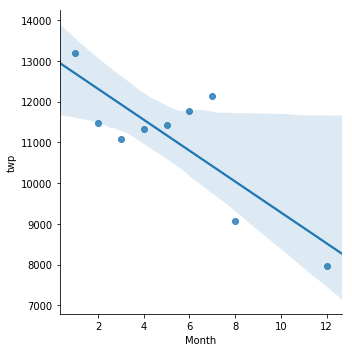

In [41]:
#lmplot to create linear fit
sn.lmplot(x='Month',y='twp', data=byMonth.reset_index())

In [42]:
#create new column date
t=df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

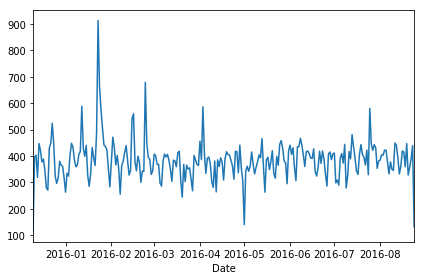

In [44]:
#groupby this date with count and plot count of 911 cals
df.groupby('Date').count()['lat'].plot()

plt.tight_layout() #if dates are overlaping

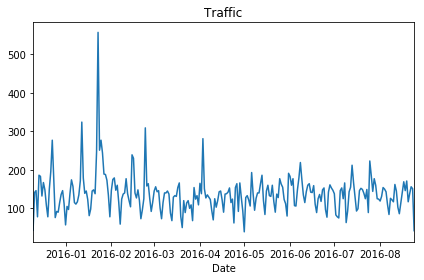

In [65]:
#recreate plot for reason for call of 911 cals
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout() #if dates are overlaping

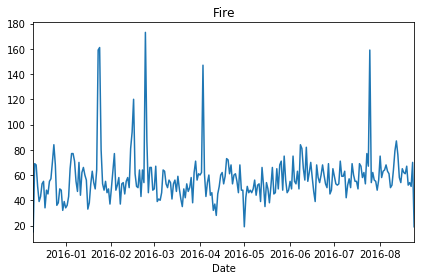

In [64]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout() #if dates are overlaping

In [50]:
#new create heat map , restruct the df so that column become hours and
#index become day of week method =unstack , to check call every hours
dayHour=df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

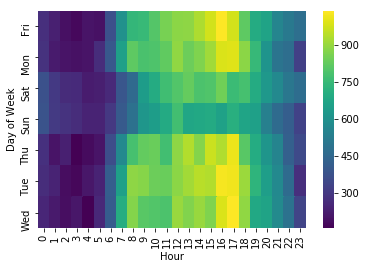

In [51]:
sn.heatmap(dayHour, cmap='viridis')

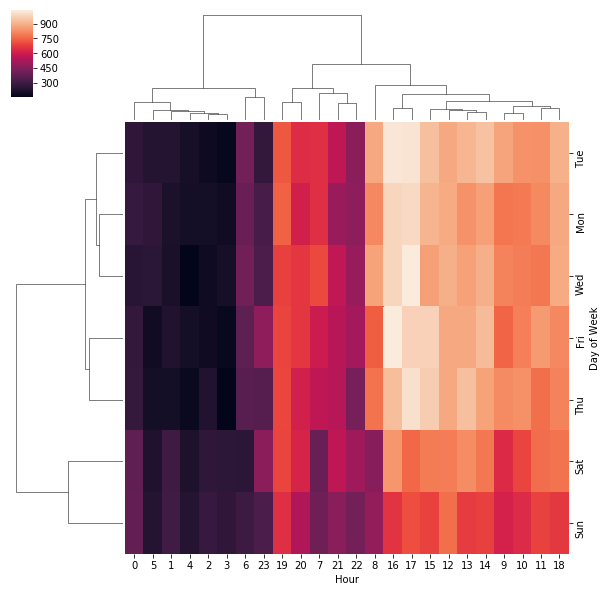

In [52]:
#clustermap
sn.clustermap(dayHour)